# Energy Efficiency Dataset
Attribute Information:
The dataset contains eight attributes (or features, denoted by X1…X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.
Specifically:
X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution
y1 Heating Load
y2 Cooling Load
import pandas as pd

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("ENB2012_data.csv")

In [3]:
data.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


# Plotting Heatmap

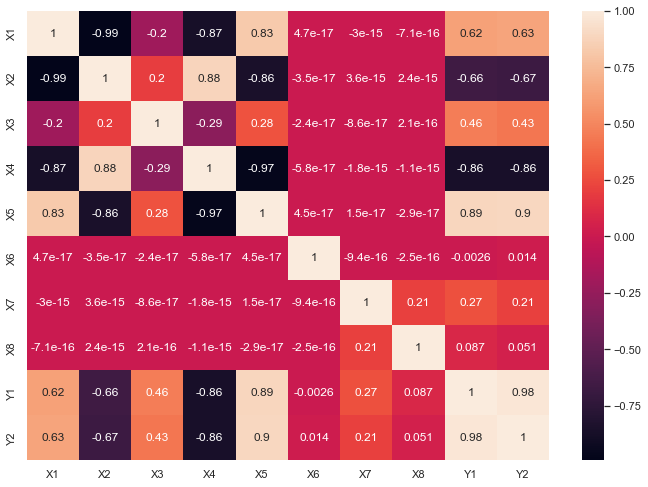

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
dataplot = sns.heatmap(data.corr(), annot=True)
plt.show()

In [7]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [9]:
# Data set is free of any null values. We are good to go.


In [10]:
data.duplicated().sum()

0

In [11]:
# Data set is devoid of duplicated values.

In [12]:
# choosing x and y values:
# we have 2 y values - Y1 & Y2 as targets. 

In [13]:
X =data.iloc[:, 0:8].values

In [14]:
X

array([[9.800e-01, 5.145e+02, 2.940e+02, ..., 2.000e+00, 0.000e+00,
        0.000e+00],
       [9.800e-01, 5.145e+02, 2.940e+02, ..., 3.000e+00, 0.000e+00,
        0.000e+00],
       [9.800e-01, 5.145e+02, 2.940e+02, ..., 4.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 3.000e+00, 4.000e-01,
        5.000e+00],
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 4.000e+00, 4.000e-01,
        5.000e+00],
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 5.000e+00, 4.000e-01,
        5.000e+00]])

In [15]:
X.shape

(768, 8)

In [16]:
Y1 = data.iloc[:, 8].values

In [17]:
Y1.shape

(768,)

In [18]:
Y2 = data.iloc[:, 9].values

In [19]:
Y1

array([15.55, 15.55, 15.55, 15.55, 20.84, 21.46, 20.71, 19.68, 19.5 ,
       19.95, 19.34, 18.31, 17.05, 17.41, 16.95, 15.98, 28.52, 29.9 ,
       29.63, 28.75, 24.77, 23.93, 24.77, 23.93,  6.07,  6.05,  6.01,
        6.04,  6.37,  6.4 ,  6.37,  6.4 ,  6.85,  6.79,  6.77,  6.81,
        7.18,  7.1 ,  7.1 ,  7.1 , 10.85, 10.54, 10.77, 10.56,  8.6 ,
        8.49,  8.45,  8.5 , 24.58, 24.63, 24.63, 24.59, 29.03, 29.87,
       29.14, 28.09, 26.28, 26.91, 26.37, 25.27, 23.53, 24.03, 23.54,
       22.58, 35.56, 37.12, 36.9 , 35.94, 32.96, 32.12, 32.94, 32.21,
       10.36, 10.43, 10.36, 10.39, 10.71, 10.8 , 10.7 , 10.75, 11.11,
       11.13, 11.09, 11.16, 11.68, 11.69, 11.7 , 11.69, 15.41, 15.2 ,
       15.42, 15.21, 12.96, 12.97, 12.93, 13.02, 24.29, 24.31, 24.13,
       24.25, 28.88, 29.68, 28.83, 27.9 , 26.48, 27.02, 26.33, 25.36,
       23.75, 24.23, 23.67, 22.79, 35.65, 37.26, 36.97, 36.03, 33.16,
       32.4 , 33.12, 32.41, 10.42, 10.46, 10.32, 10.45, 10.64, 10.72,
       10.55, 10.68,

In [20]:
Y2

array([21.33, 21.33, 21.33, 21.33, 28.28, 25.38, 25.16, 29.6 , 27.3 ,
       21.97, 23.49, 27.87, 23.77, 21.46, 21.16, 24.93, 37.73, 31.27,
       30.93, 39.44, 29.79, 29.68, 29.79, 29.4 , 10.9 , 11.19, 10.94,
       11.17, 11.27, 11.72, 11.29, 11.67, 11.74, 12.05, 11.73, 11.93,
       12.4 , 12.23, 12.4 , 12.14, 16.78, 16.8 , 16.75, 16.67, 12.07,
       12.22, 12.08, 12.04, 26.47, 26.37, 26.44, 26.29, 32.92, 29.87,
       29.58, 34.33, 30.89, 25.6 , 27.03, 31.73, 27.31, 24.91, 24.61,
       28.51, 41.68, 35.28, 34.43, 43.33, 33.87, 34.07, 34.14, 33.67,
       13.43, 13.71, 13.48, 13.7 , 13.8 , 14.28, 13.87, 14.27, 14.28,
       14.61, 14.3 , 14.45, 13.9 , 13.72, 13.88, 13.65, 19.37, 19.43,
       19.34, 19.32, 14.34, 14.5 , 14.33, 14.27, 25.95, 25.63, 26.13,
       25.89, 32.54, 29.44, 29.36, 34.2 , 30.91, 25.63, 27.36, 31.9 ,
       27.38, 25.02, 24.8 , 28.79, 41.07, 34.62, 33.87, 42.86, 33.91,
       34.07, 34.17, 33.78, 13.39, 13.72, 13.57, 13.79, 13.67, 14.11,
       13.8 , 14.21,

In [21]:
# We have to create seperate models for Y1 & Y2

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()

In [24]:
sc.fit_transform(X)

array([[ 2.04177671, -1.78587489, -0.56195149, ..., -1.34164079,
        -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, ..., -0.4472136 ,
        -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, ...,  0.4472136 ,
        -1.76044698, -1.81457514],
       ...,
       [-1.36381225,  1.55394308,  1.12390297, ..., -0.4472136 ,
         1.2440492 ,  1.41133622],
       [-1.36381225,  1.55394308,  1.12390297, ...,  0.4472136 ,
         1.2440492 ,  1.41133622],
       [-1.36381225,  1.55394308,  1.12390297, ...,  1.34164079,
         1.2440492 ,  1.41133622]])

In [25]:
X_train, X_test, Y1_train, Y1_test = train_test_split(X,Y1, test_size=0.20, random_state=0)

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Model for Y1

In [27]:
Y1_rfr = RandomForestRegressor()

In [28]:
Y1_rfr.fit(X_train, Y1_train)

RandomForestRegressor()

In [29]:
Y1_predict = Y1_rfr.predict(X_test)

In [30]:
Y1_predict

array([15.1757, 10.4133, 36.1471, 17.4549, 32.447 , 29.1298, 28.373 ,
       29.1048, 28.7951, 23.627 ,  6.3626, 42.3601, 11.3682, 42.1265,
       41.2074, 26.174 , 10.6891, 29.2723, 14.3726, 12.4045, 12.7717,
       32.6779, 10.667 , 39.2676,  6.0446, 14.635 , 12.9014, 13.939 ,
       10.7053, 39.7477, 12.7346, 12.9002, 41.8043, 12.953 , 28.5633,
       36.8568, 14.1756, 36.8239, 17.1083, 10.4044, 11.5346, 39.8142,
       14.5665, 25.7789, 19.2221, 24.2896, 10.6992, 12.7013, 28.3976,
       31.8839, 32.5351, 12.9458, 33.0255, 14.9908, 36.8487, 10.3904,
       17.3974, 27.0225, 38.6579, 14.5537, 15.0243, 12.3808, 32.4871,
       10.3185, 12.487 , 12.1161, 39.3385, 11.1758, 26.6695, 39.1578,
       32.6379, 10.6762, 23.4568, 17.0497, 15.236 , 26.049 , 32.5471,
       39.0765, 32.5078, 14.5686, 36.024 , 28.7522, 11.6692, 14.18  ,
       28.9406, 25.9695, 24.1097, 29.2813, 12.8712, 17.038 , 14.4472,
       26.6712, 12.428 , 24.3795, 40.4564, 16.9567, 28.9397, 14.6294,
        7.1682, 36.7

In [31]:
Y1_rfr.score(X_test, Y1_test)

0.996880255911811

In [32]:
r2_score(Y1_test,Y1_predict)

0.996880255911811

# Model for Y2

In [33]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X,Y2,test_size=0.2, random_state=0)

In [34]:
Y2_rfr = RandomForestRegressor()

In [35]:
Y2_rfr.fit(X2_train, Y2_train)

RandomForestRegressor()

In [36]:
Y2_predict = Y2_rfr.predict(X2_test)

In [37]:
Y2_predict

array([17.662 , 13.6082, 37.3948, 22.9688, 32.5838, 29.7798, 29.6808,
       30.4833, 33.9229, 27.0338, 11.4782, 40.8107, 14.7163, 41.3523,
       45.076 , 27.6381, 14.1999, 29.7831, 14.7442, 15.0816, 15.6319,
       32.476 , 13.8658, 42.871 , 11.0931, 17.2378, 14.0457, 16.4704,
       14.1516, 39.0053, 14.2492, 15.9869, 43.0457, 15.9625, 29.7226,
       36.7344, 15.9912, 36.878 , 16.8659, 16.8402, 13.9174, 38.2552,
       17.1563, 27.2459, 25.313 , 25.7022, 14.1655, 15.8798, 32.4904,
       35.0878, 33.0045, 14.3795, 34.0865, 17.6712, 36.8773, 13.6091,
       22.0248, 27.5642, 41.7823, 17.1445, 18.1379, 14.8936, 32.7781,
       13.4125, 15.266 , 14.8087, 43.7225, 14.2652, 27.653 , 40.3283,
       33.505 , 14.1726, 27.2555, 17.0572, 19.3646, 27.2516, 32.6497,
       42.8478, 32.7286, 16.8206, 37.135 , 31.5245, 14.1385, 14.8105,
       32.3499, 27.2236, 26.0816, 33.2168, 14.2583, 16.9241, 17.0527,
       27.076 , 15.1863, 25.8275, 39.9411, 17.2379, 30.4282, 16.5924,
       12.377 , 36.8

In [38]:
Y2_rfr.score(X2_test, Y2_test)

0.9646597527242391

In [39]:
r2_score(Y2_test, Y2_predict)

0.9646597527242391

# Final Result

In [40]:
Submission = pd.DataFrame(zip(Y1_predict,Y2_predict), columns=("Heating_load", "Cooling_load"))

In [41]:
Submission.head()

,Heating_load,Cooling_load
0,15.1757,17.6620
1,10.4133,13.6082
2,36.1471,37.3948
3,17.4549,22.9688
4,32.4470,32.5838
